In [2]:
### Import Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
import scipy.stats as stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [20,10]

# Analysis of Data At the Time of Application

In [3]:
### Import data set with information at the time of application
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--",""]
Current_df= pd.read_csv(r'C:\Users\SouvikS\Upgrad Jupyter Notebooks\loan\loan.csv',low_memory=False, na_values = missing_value_formats)
Current_df.head(5)
#set low_memory=False
### Check for no. of rows and columns
Current_df.shape

(39717, 111)

In [4]:
### Get Descriptive stats across dataframe

Current_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
### Check for missing values across columns
round(100*(Current_df.isnull().sum()/len(Current_df)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [6]:
#Dropping columns with more than 20% missing values
cols= Current_df.columns[(Current_df.isnull().sum()/len(Current_df)) >0.2]
cols
Current_df2=Current_df.drop(cols,axis=1)

In [7]:
#### dropping columns which is not carrying any analytical or business value
cols= Current_df2[['pymnt_plan','initial_list_status'
                  ,'policy_code','application_type','acc_now_delinq','pub_rec_bankruptcies','tax_liens'
                  ,'delinq_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths'
                  ,'emp_title','url','title']]
cols
Current_df3=Current_df2.drop(cols,axis=1)


In [8]:
#Creating new columns from date columns and % cols and dropping the old ones
Current_df3['issue_d'] = pd.to_datetime(Current_df3['issue_d'])
Current_df3['last_pymnt_d'] = pd.to_datetime(Current_df3['last_pymnt_d'])
Current_df3['last_credit_pull_d'] = pd.to_datetime(Current_df3['last_credit_pull_d'])
Current_df3['int_rate'] = Current_df3['int_rate'].str.rstrip('%').astype('float') / 100.0
Current_df3['revol_util'] = Current_df3['revol_util'].str.rstrip('%').astype('float') / 100.0

In [9]:
#Missing Values
round(100*(Current_df3.isnull().sum()/len(Current_df3)),2) 

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_py

In [10]:
# removing rows with any missing value as they are a tiny percentage
Current_df3.dropna(axis=0,inplace=True,how='any')
# verifying
round(100*(Current_df3.isnull().sum()/len(Current_df3)),2) 

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_re

In [11]:
#Lets divide the data into 3 types of data columns
    #CUSTOMER DEMOGRAPHICS, which will include all the customer related information,
    #LOAN CONSTRAINTS, that lending company applies on the loan like interest rate &
    #LOAN OUTCOME, like payment, dues, etc
#Since our goal is to understand the effect of customer application on the loan outcome,
#our primary focus will be on the relationship between CUSTOMER DEMOGRAPHICS and LOAN OUTCOME

From the remaing pool of Columns, unordered categorical variables are:
    home_ownership
    purpose
    zip_code
    addr_state

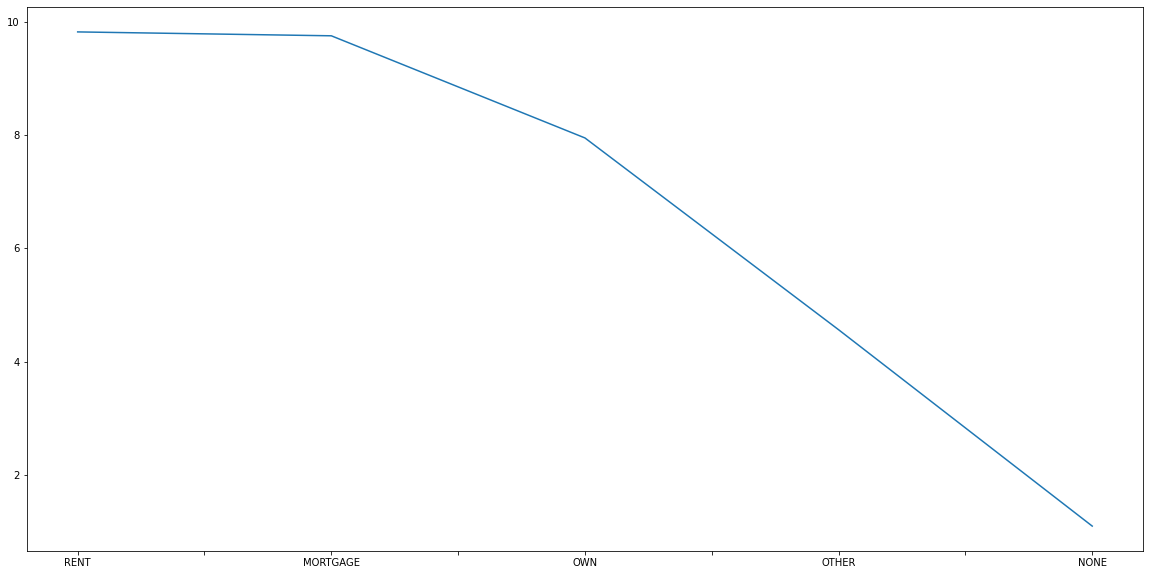

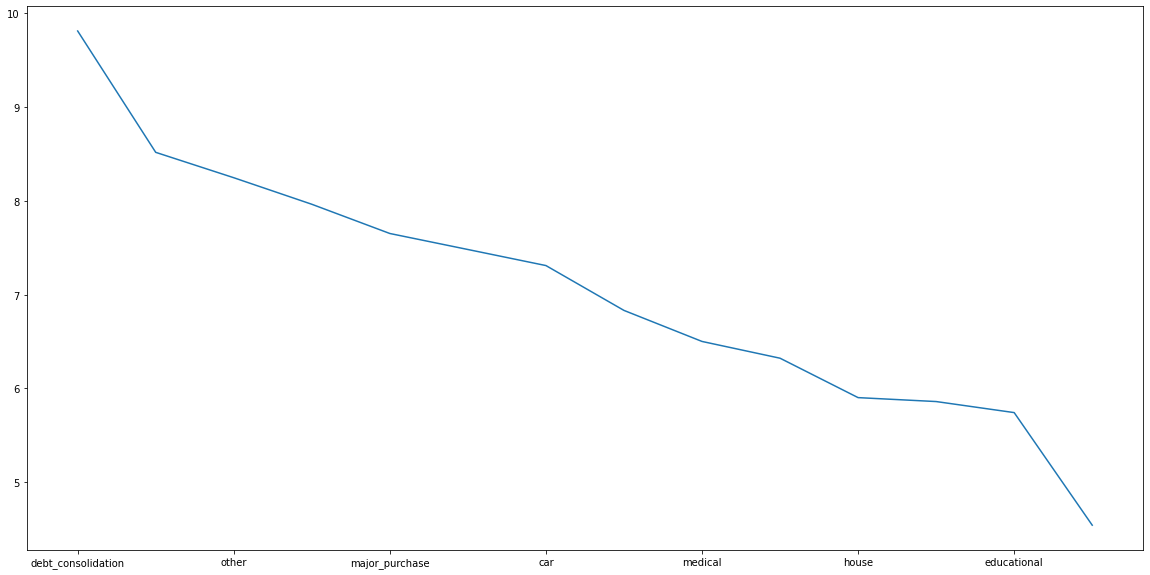

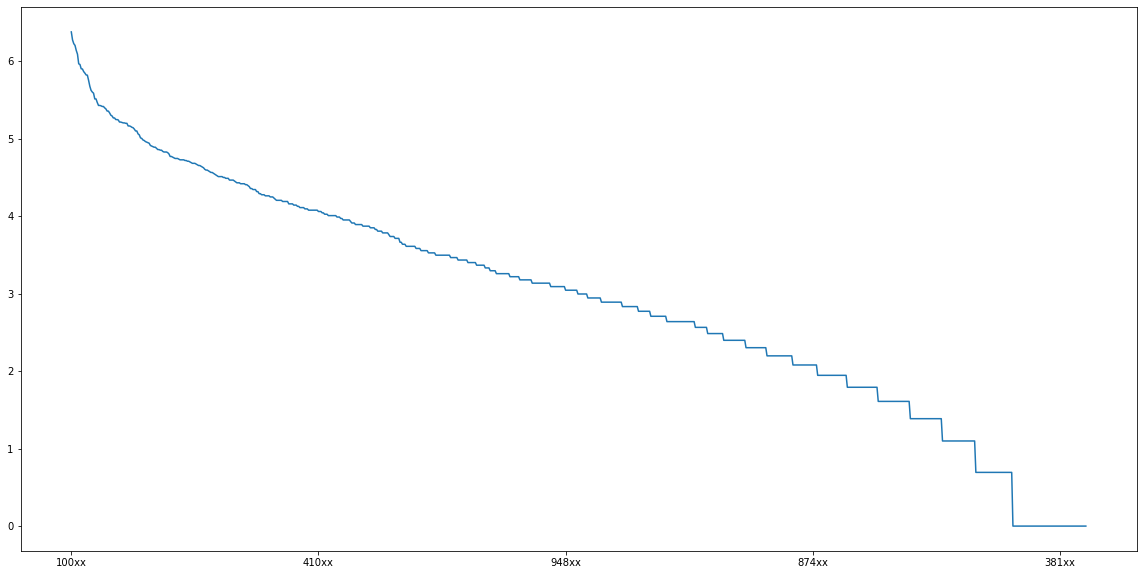

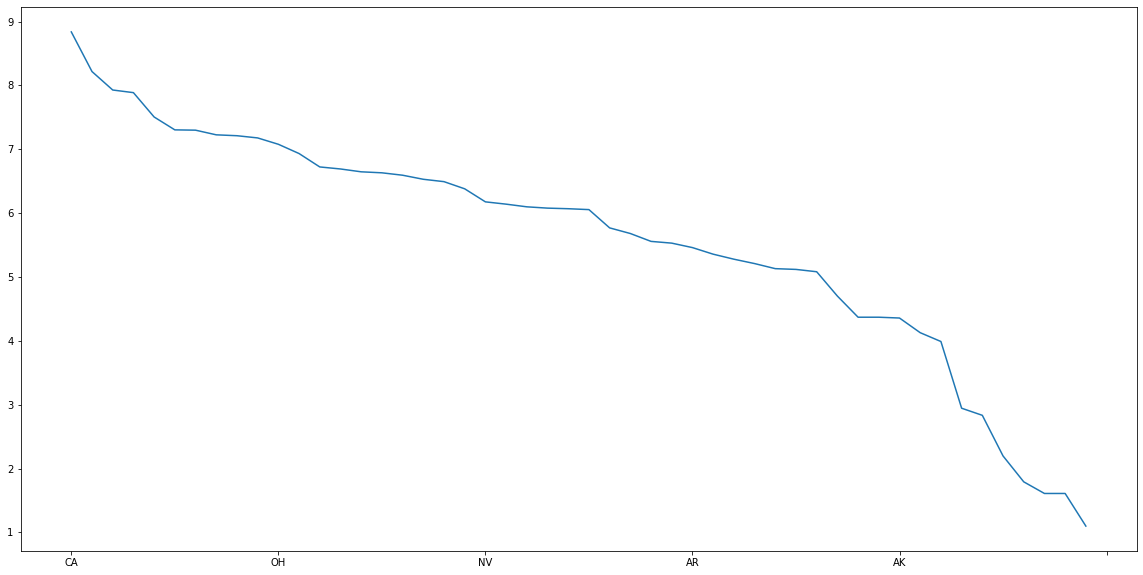

In [12]:
# log log scale
np.log(Current_df3['home_ownership'].value_counts()).plot(kind='line')
plt.show()
np.log(Current_df3['purpose'].value_counts()).plot(kind='line')
plt.show()
np.log(Current_df3['zip_code'].value_counts()).plot(kind='line')
plt.show()
np.log(Current_df3['addr_state'].value_counts()).plot(kind='line')
plt.show()

#Unordered categorical variables follows power law for but are not sufficient to give insightful information

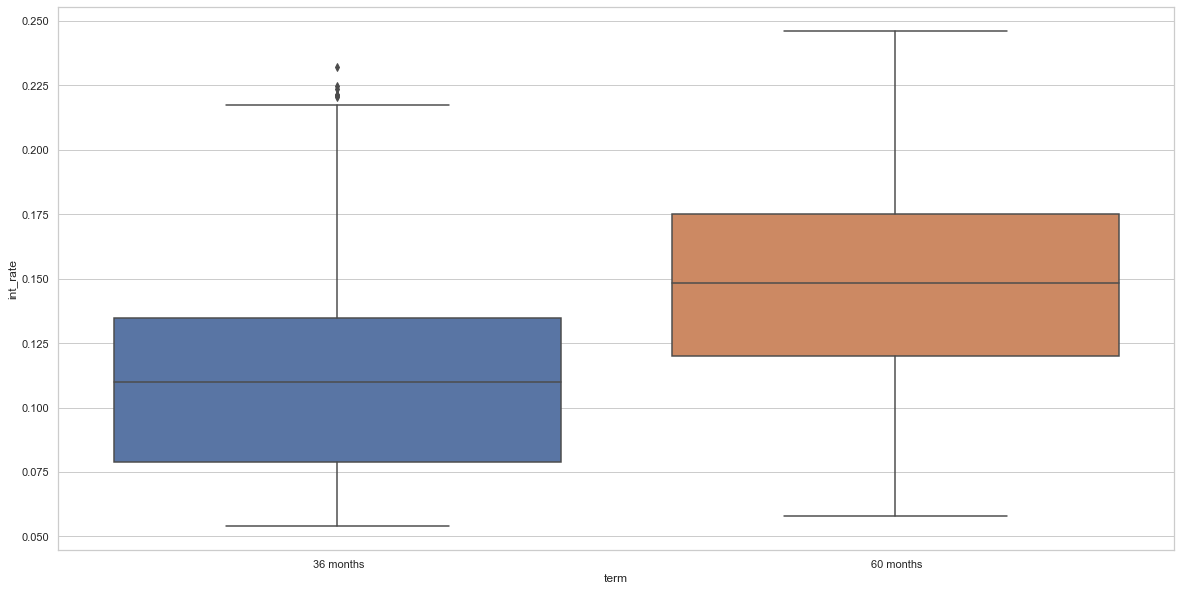

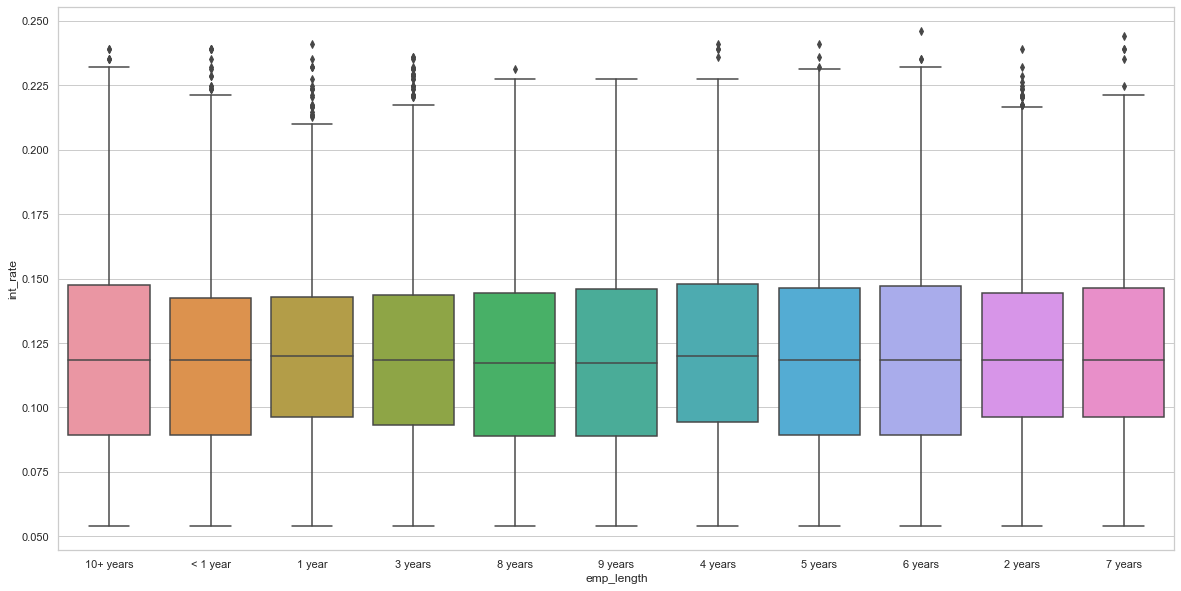

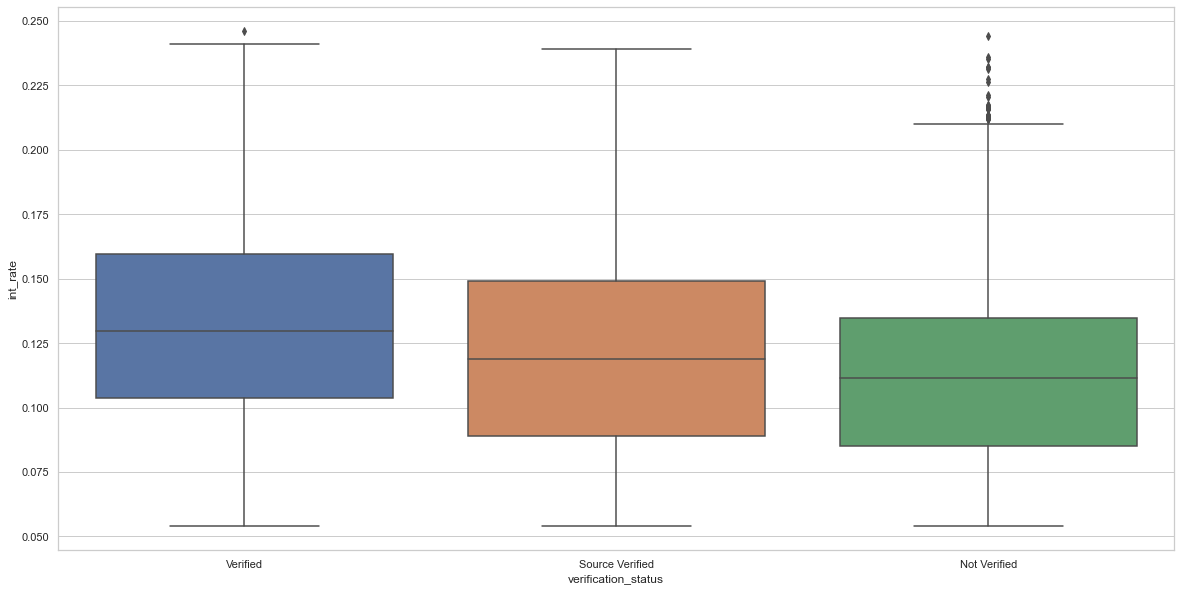

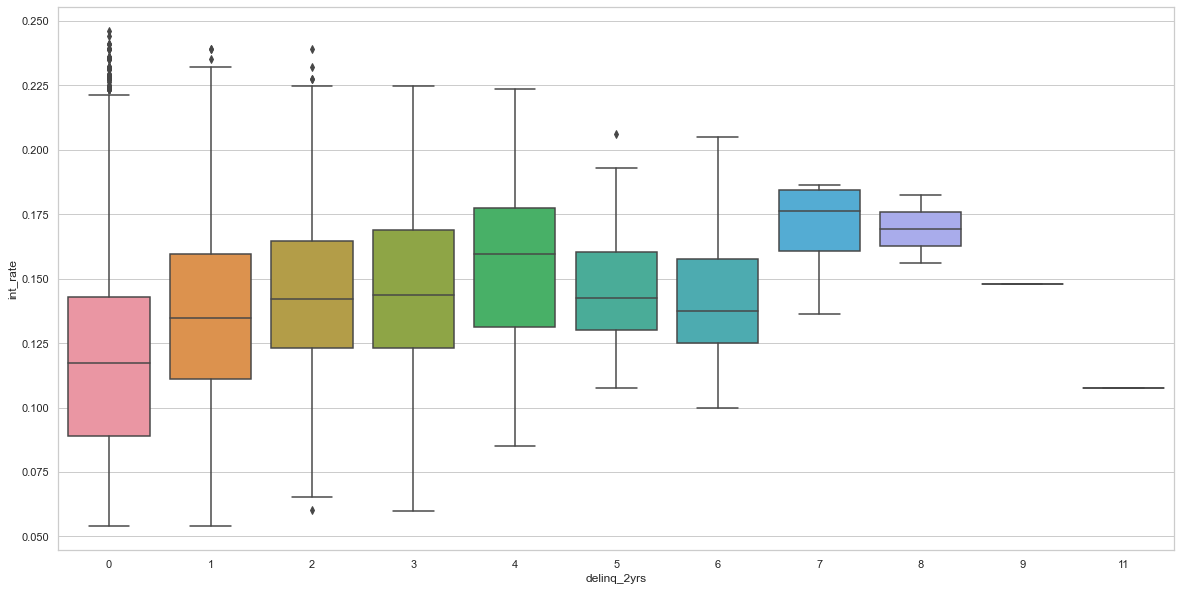

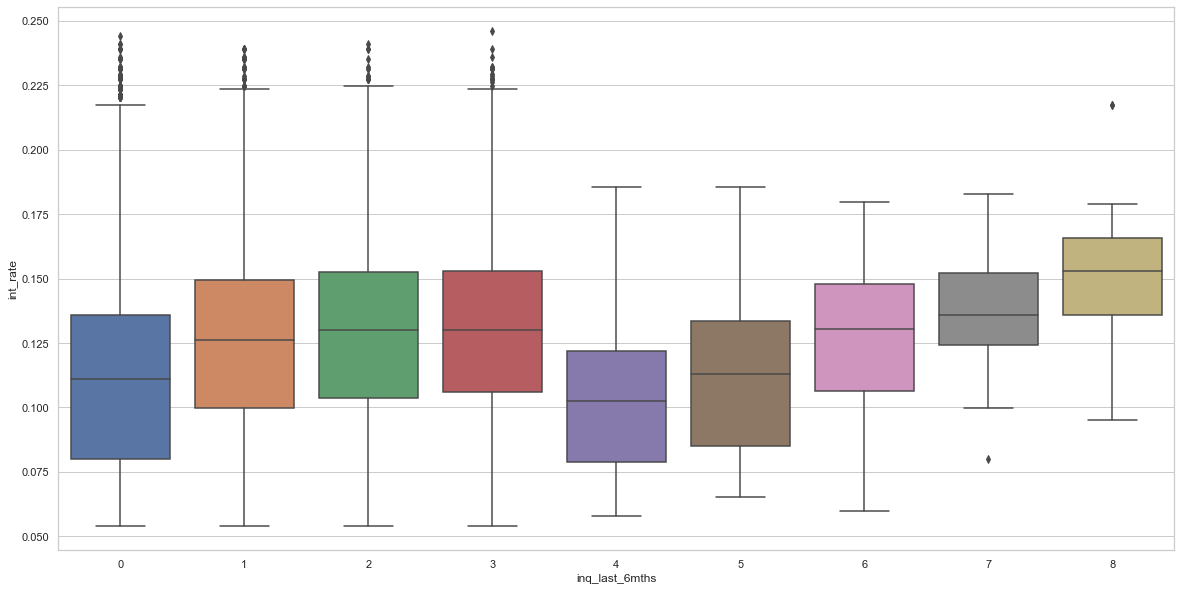

In [13]:
# ordered categorical variable
# We can understand from the data and also general knowledge about risk analytics, that with a risky customer, 
# the interest rate increases and hence we can analyze the ordered categorical variables wrt interest rate for simplification
#Ordered categorical variables are: 
#term, grade, sub_grade, emop_length, verfication_status, delinq_2yrs, inq_last_6mths, mths_since_last_delinq

import seaborn as sns
sns.set_theme(style="whitegrid")
ax1 = sns.boxplot(x="term", y="int_rate", data=Current_df3)
plt.show()

sns.set_theme(style="whitegrid")
ax2 = sns.boxplot(x="emp_length", y="int_rate", data=Current_df3)
plt.show()

sns.set_theme(style="whitegrid")
ax3 = sns.boxplot(x="verification_status", y="int_rate", data=Current_df3)
plt.show()

sns.set_theme(style="whitegrid")
ax4 = sns.boxplot(x="delinq_2yrs", y="int_rate", data=Current_df3)
plt.show()

sns.set_theme(style="whitegrid")
ax5 = sns.boxplot(x="inq_last_6mths", y="int_rate", data=Current_df3)
plt.show()

In [14]:
#Conclusion: Univariate analysis of orderded categorical variables show:
# 1. Applications with 5 years term is riskier than with 3 years term
# 2. Emp length and verification status does not have significant impact on risk
# 3. The higher the no. of delinquencies in last 2 years, higher is the risk
# 4. An optimum # of inquiries in last 6 months in best. Too many inquiries or too less inquireis are both signs of higher risk

In [15]:
Current_df4 = Current_df3[(Current_df3["loan_status"] == 'Charged Off') | (Current_df3["loan_status"] == 'Fully Paid')]
#Current_df4.to_csv(r'C:\Users\SouvikS\Upgrad Jupyter Notebooks\loan\loan-segmented.csv')

In [16]:
# segmented analysis
#home_ownership,purpose,zip_code,addr_state
#term, emp_length, verification_status, delinq_2yrs, inq_last_6mths

pivot_home_ownership = Current_df4.pivot_table(index=['home_ownership'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot_home_ownership = pd.DataFrame(pivot_home_ownership.to_records())
rate = pivot_home_ownership["('int_rate', 'Charged Off')"]/(pivot_home_ownership["('int_rate', 'Charged Off')"] + pivot_home_ownership["('int_rate', 'Fully Paid')"])
pivot_home_ownership["ChargedOffRate"] = rate*100
print(pivot_home_ownership)

pivot_purpose = Current_df4.pivot_table(index=['purpose'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot_purpose = pd.DataFrame(pivot_purpose.to_records())
rate = pivot_purpose["('int_rate', 'Charged Off')"]/(pivot_purpose["('int_rate', 'Charged Off')"] + pivot_purpose["('int_rate', 'Fully Paid')"])
pivot_purpose["ChargedOffRate"] = rate*100
print(pivot_purpose)

pivot_zip_code = Current_df4.pivot_table(index=['zip_code'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot_zip_code = pd.DataFrame(pivot_zip_code.to_records())
rate = pivot_zip_code["('int_rate', 'Charged Off')"]/(pivot_zip_code["('int_rate', 'Charged Off')"] + pivot_zip_code["('int_rate', 'Fully Paid')"])
pivot_zip_code["ChargedOffRate"] = rate*100
print(pivot_zip_code)

pivot_addr_state = Current_df4.pivot_table(index=['addr_state'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot_addr_state = pd.DataFrame(pivot_addr_state.to_records())
rate = pivot_addr_state["('int_rate', 'Charged Off')"]/(pivot_addr_state["('int_rate', 'Charged Off')"] + pivot_addr_state["('int_rate', 'Fully Paid')"])
pivot_addr_state["ChargedOffRate"] = rate*100
print(pivot_addr_state)

pivot_term = Current_df4.pivot_table(index=['term'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot_term = pd.DataFrame(pivot_term.to_records())
rate = pivot_term["('int_rate', 'Charged Off')"]/(pivot_term["('int_rate', 'Charged Off')"] + pivot_term["('int_rate', 'Fully Paid')"])
pivot_term["ChargedOffRate"] = rate*100
print(pivot_term)

pivot_emp_length = Current_df4.pivot_table(index=['emp_length'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot_emp_length = pd.DataFrame(pivot_emp_length.to_records())
rate = pivot_emp_length["('int_rate', 'Charged Off')"]/(pivot_emp_length["('int_rate', 'Charged Off')"] + pivot_emp_length["('int_rate', 'Fully Paid')"])
pivot_emp_length["ChargedOffRate"] = rate*100
print(pivot_emp_length)

pivot_verification_status = Current_df4.pivot_table(index=['verification_status'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot_verification_status = pd.DataFrame(pivot_verification_status.to_records())
rate = pivot_verification_status["('int_rate', 'Charged Off')"]/(pivot_verification_status["('int_rate', 'Charged Off')"] + pivot_verification_status["('int_rate', 'Fully Paid')"])
pivot_verification_status["ChargedOffRate"] = rate*100
print(pivot_verification_status)

pivot_delinq_2yrs = Current_df4.pivot_table(index=['delinq_2yrs'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot_delinq_2yrs = pd.DataFrame(pivot_delinq_2yrs.to_records())
rate = pivot_delinq_2yrs["('int_rate', 'Charged Off')"]/(pivot_delinq_2yrs["('int_rate', 'Charged Off')"] + pivot_delinq_2yrs["('int_rate', 'Fully Paid')"])
pivot_delinq_2yrs["ChargedOffRate"] = rate*100
print(pivot_delinq_2yrs)

pivot_inq_last_6mths = Current_df4.pivot_table(index=['inq_last_6mths'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot_inq_last_6mths = pd.DataFrame(pivot_inq_last_6mths.to_records())
rate = pivot_inq_last_6mths["('int_rate', 'Charged Off')"]/(pivot_inq_last_6mths["('int_rate', 'Charged Off')"] + pivot_inq_last_6mths["('int_rate', 'Fully Paid')"])
pivot_inq_last_6mths["ChargedOffRate"] = rate*100
print(pivot_inq_last_6mths)


  home_ownership  ('int_rate', 'Charged Off')  ('int_rate', 'Fully Paid')  ChargedOffRate
0       MORTGAGE                       2229.0                     14343.0       13.450398
1           NONE                          NaN                         3.0             NaN
2          OTHER                         18.0                        78.0       18.750000
3            OWN                        395.0                      2367.0       14.301231
4           RENT                       2679.0                     15321.0       14.883333
               purpose  ('int_rate', 'Charged Off')  ('int_rate', 'Fully Paid')  ChargedOffRate
0                  car                          154                        1292       10.650069
1          credit_card                          507                        4388       10.357508
2   debt_consolidation                         2647                       14990       15.008221
3          educational                           50                         

In [17]:
#Conclusions:
    #Applicant for 'Small business' loans are risky
    #Applicants from certain zip codes like '996xx' and '997xx' are risky
    #Applicants from certain state like 'AK','NE','SD' are risky
    #Applicants with 5 year term are riskier
    #Applicants with 6-7 inquiries in 2 years are riskier

In [26]:
#Bivariate Analysis with combination of two columns
    #home_ownership & term, emp_length, verification_status, delinq_2yrs

pivot = Current_df4.pivot_table(index=['home_ownership','term'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['home_ownership','emp_length'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['home_ownership','verification_status'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['home_ownership','delinq_2yrs'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

    #purpose & term, emp_length, verification_status, delinq_2yrs

pivot = Current_df4.pivot_table(index=['purpose','term'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['purpose','emp_length'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['purpose','verification_status'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['purpose','delinq_2yrs'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

    #zip_code & term, emp_length, verification_status, delinq_2yrs

pivot = Current_df4.pivot_table(index=['zip_code','term'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['zip_code','emp_length'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['zip_code','verification_status'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['zip_code','delinq_2yrs'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

    #addr_state & term, emp_length, verification_status, delinq_2yrs

pivot = Current_df4.pivot_table(index=['addr_state','term'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['addr_state','emp_length'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['addr_state','verification_status'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['addr_state','delinq_2yrs'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

    #home_ownership,purpose,zip_code,addr_state
    
pivot = Current_df4.pivot_table(index=['home_ownership','purpose'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['home_ownership','zip_code'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['home_ownership','addr_state'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['purpose','zip_code'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['purpose','addr_state'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['zip_code','addr_state'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

    #term, emp_length, verification_status, delinq_2yrs

pivot = Current_df4.pivot_table(index=['term','emp_length'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['term','verification_status'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['term','delinq_2yrs'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['emp_length','verification_status'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['emp_length','delinq_2yrs'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

pivot = Current_df4.pivot_table(index=['verification_status','delinq_2yrs'], columns=['loan_status'], values= ['int_rate'], aggfunc='count')
pivot = pd.DataFrame(pivot.to_records())
rate = pivot["('int_rate', 'Charged Off')"]/(pivot["('int_rate', 'Charged Off')"] + pivot["('int_rate', 'Fully Paid')"])
pivot["ChargedOffRate"] = rate*100
print(pivot)

  home_ownership        term  ('int_rate', 'Charged Off')  ('int_rate', 'Fully Paid')  ChargedOffRate
0       MORTGAGE   36 months                       1118.0                     10550.0        9.581762
1       MORTGAGE   60 months                       1111.0                      3793.0       22.654976
2           NONE   36 months                          NaN                         3.0             NaN
3          OTHER   36 months                         17.0                        78.0       17.894737
4          OTHER   60 months                          1.0                         NaN             NaN
5            OWN   36 months                        222.0                      1910.0       10.412758
6            OWN   60 months                        173.0                       457.0       27.460317
7           RENT   36 months                       1656.0                     12640.0       11.583660
8           RENT   60 months                       1023.0                      268

   addr_state        term  ('int_rate', 'Charged Off')  ('int_rate', 'Fully Paid')  ChargedOffRate
0          AK   36 months                          9.0                        45.0       16.666667
1          AK   60 months                          6.0                        16.0       27.272727
2          AL   36 months                         21.0                       283.0        6.907895
3          AL   60 months                         28.0                        84.0       25.000000
4          AR   36 months                         14.0                       156.0        8.235294
5          AR   60 months                         12.0                        44.0       21.428571
6          AZ   36 months                         67.0                       519.0       11.433447
7          AZ   60 months                         46.0                       171.0       21.198157
8          CA   36 months                        639.0                      4562.0       12.286099
9         

          term emp_length  ('int_rate', 'Charged Off')  ('int_rate', 'Fully Paid')  ChargedOffRate
0    36 months     1 year                          291                        2279       11.322957
1    36 months  10+ years                          623                        5209       10.682442
2    36 months    2 years                          351                        3053       10.311398
3    36 months    3 years                          326                        2756       10.577547
4    36 months    4 years                          273                        2276       10.710082
5    36 months    5 years                          245                        2097       10.461144
6    36 months    6 years                          163                        1399       10.435339
7    36 months    7 years                          133                        1114       10.665597
8    36 months    8 years                          107                         937       10.249042
9    36 mo

In [ ]:
#Conclusions:
    #Applicants with purpose as 'education' and term '60 months' are riskier
    #loans for small business are risky however, small business and 60 months term are even riskier
    #Applicants with purpose as 'education' and emp_length '3' are riskier
    #Applicant with purpose 'house' and emp_length of 6 years are riskier
    # Applicant with home_ownership as 'other' and purpose as 'small business' are riskier